<a href="https://colab.research.google.com/github/rockingboi/Flames_assignment/blob/main/Flames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install rembg pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.4 MB/s eta 0:00:00


In [3]:
!pip install rembg onnxruntime-gpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.0 MB/s eta 0:00:00


In [4]:
from rembg import remove
from PIL import Image
input_path = "man.jpeg"
output_path = "man_extracted.jpg"

with open(input_path, "rb") as i:
    input_image = i.read()
output_image = remove(input_image)

with open(output_path, "wb") as o:
    o.write(output_image)
print(f"Saved extracted person to {output_path}")


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 259GB/s]


Saved extracted person to man_extracted.jpg


In [5]:
from rembg import remove
from PIL import Image
import numpy as np
input_path = "man.jpeg"
output_path = "man_extracted.jpg"
mask_output_path = "man_mask.png"
with open(input_path, "rb") as i:
    input_image = i.read()
output_image = remove(input_image)
with open(output_path, "wb") as o:
    o.write(output_image)
extracted_img = Image.open(output_path).convert("RGBA")
alpha_channel = extracted_img.getchannel("A")
mask = alpha_channel.point(lambda p: 255 if p > 0 else 0)
mask.save(mask_output_path)
print(f"✅ Mask saved as: {mask_output_path}")


✅ Mask saved as: man_mask.png


In [6]:
from PIL import Image, ImageFilter
import numpy as np
input_path = "man_extracted.jpg"
output_path = "man_homogenized.png"
image = Image.open(input_path).convert("RGBA")
data = np.array(image)
r, g, b, a = data[:,:,0], data[:,:,1], data[:,:,2], data[:,:,3]
mask = a > 0
def smooth_channel(channel, mask):
    img = Image.fromarray(channel)
    blurred = img.filter(ImageFilter.GaussianBlur(radius=2))
    blurred_np = np.array(blurred)
    result = channel.copy()
    result[mask] = blurred_np[mask]
    return result
r_smooth = smooth_channel(r, mask)
g_smooth = smooth_channel(g, mask)
b_smooth = smooth_channel(b, mask)
homogenized_data = np.stack([r_smooth, g_smooth, b_smooth, a], axis=2)
homogenized_image = Image.fromarray(homogenized_data.astype('uint8'), mode='RGBA')
homogenized_image.save(output_path)
print(f"✅ Homogenized image saved as {output_path}")


✅ Homogenized image saved as man_homogenized.png


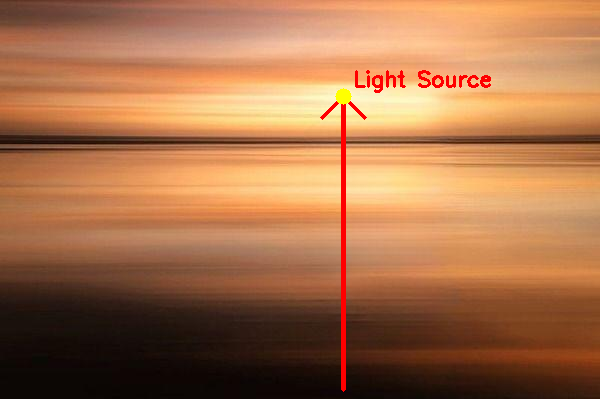

✅ Light direction image saved as 'light_direction_pointed.jpg'


In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img_path = "background.jpeg"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (25, 25), 0)
inv = cv2.bitwise_not(blur)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(blur)
light_pos = maxLoc
output = img.copy()
cv2.arrowedLine(output, (light_pos[0], output.shape[0]-10), light_pos, (0, 0, 255), 4, tipLength=0.1)
cv2.circle(output, light_pos, 8, (0, 255, 255), -1)
cv2.putText(output, "Light Source", (light_pos[0]+10, light_pos[1]-10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2_imshow(output)
cv2.imwrite("light_direction_pointed.jpg", output)
print("✅ Light direction image saved as 'light_direction_pointed.jpg'")


In [8]:
from PIL import Image
background = Image.open("background.jpeg").convert("RGBA")
person = Image.open("man_extracted.jpg").convert("RGBA")
width_scale = 0.3
height_scale = 0.26

new_size = (
    int(person.width * width_scale),
    int(person.height * height_scale)
)
person = person.resize(new_size, Image.Resampling.LANCZOS)

x = (background.width - person.width) // 2
y = background.height - person.height - 30

composited = background.copy()
composited.paste(person, (x, y), person)

output_path = "final_composited_shorter.png"
composited.save(output_path)
composited.show()
print(f"✅ Composite image saved as: {output_path}")

✅ Composite image saved as: final_composited_shorter.png


In [9]:
from PIL import Image, ImageOps
img = Image.open("/content/final_composited_shorter.png").convert("RGBA")

In [10]:
from PIL import ImageOps
import numpy as np
reflection = ImageOps.flip(img)
mask = Image.new("L", img.size, 0)
gradient = np.linspace(255, 0, img.height).astype(np.uint8)
for y in range(img.height):
    for x in range(img.width):
        mask.putpixel((x, y), int(gradient[y]))
reflection.putalpha(mask)

In [11]:
canvas = Image.new("RGBA", (img.width, img.height * 2))
canvas.paste(img, (0, 0))
canvas.paste(reflection, (0, img.height), reflection)

In [12]:
overlay = Image.new("RGBA", canvas.size, (255, 150, 100, 60))
canvas = Image.alpha_composite(canvas, overlay)

In [13]:
canvas.save("final_sunset_reflection.png")
canvas.show()

In [14]:
from PIL import Image, ImageEnhance
img = Image.open("final_sunset_reflection.png").convert("RGBA")
r, g, b, a = img.split()
rgb_img = Image.merge("RGB", (r, g, b))
rgb_img = ImageEnhance.Brightness(rgb_img).enhance(0.95)
rgb_img = ImageEnhance.Color(rgb_img).enhance(1.3)
rgb_img = ImageEnhance.Contrast(rgb_img).enhance(1.15)
final_img = Image.merge("RGBA", (*rgb_img.split(), a))
output_path = "final_color_blended_with_shadows.png"
final_img.save(output_path)
final_img.show()
print(f"✅ Color-blended image saved with shadows intact → {output_path}")


✅ Color-blended image saved with shadows intact → final_color_blended_with_shadows.png
